In [ ]:
from compiler.Graph import *
from compiler.QTree import *
from perceval.rendering.circuit import SymbSkin #just a compact skin
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#generate a random tree with 10 nodes
import random
random.seed(1334)
t = random_tree(10)

0 1
0 2
0 3
3 4
1 5
3 6
2 7
3 8
4 9


In [3]:
#build a new Quantum Tree
q = QTree(t.head.value)
#print the number of outer circles needed to implement this tree with optimal bfs
print(build_optimal(t.head, q))

7


In [4]:
expand = [(t.head,0)]
while expand:
    vertex,depth = expand.pop()
    print(" "*(4*(depth-1))+("|---" if depth > 0 else "")+str(vertex.value))
    for child in vertex.children:
        expand.append((child, depth+1))

0
|---3
    |---4
        |---9
    |---8
    |---6
|---2
    |---7
|---1
    |---5


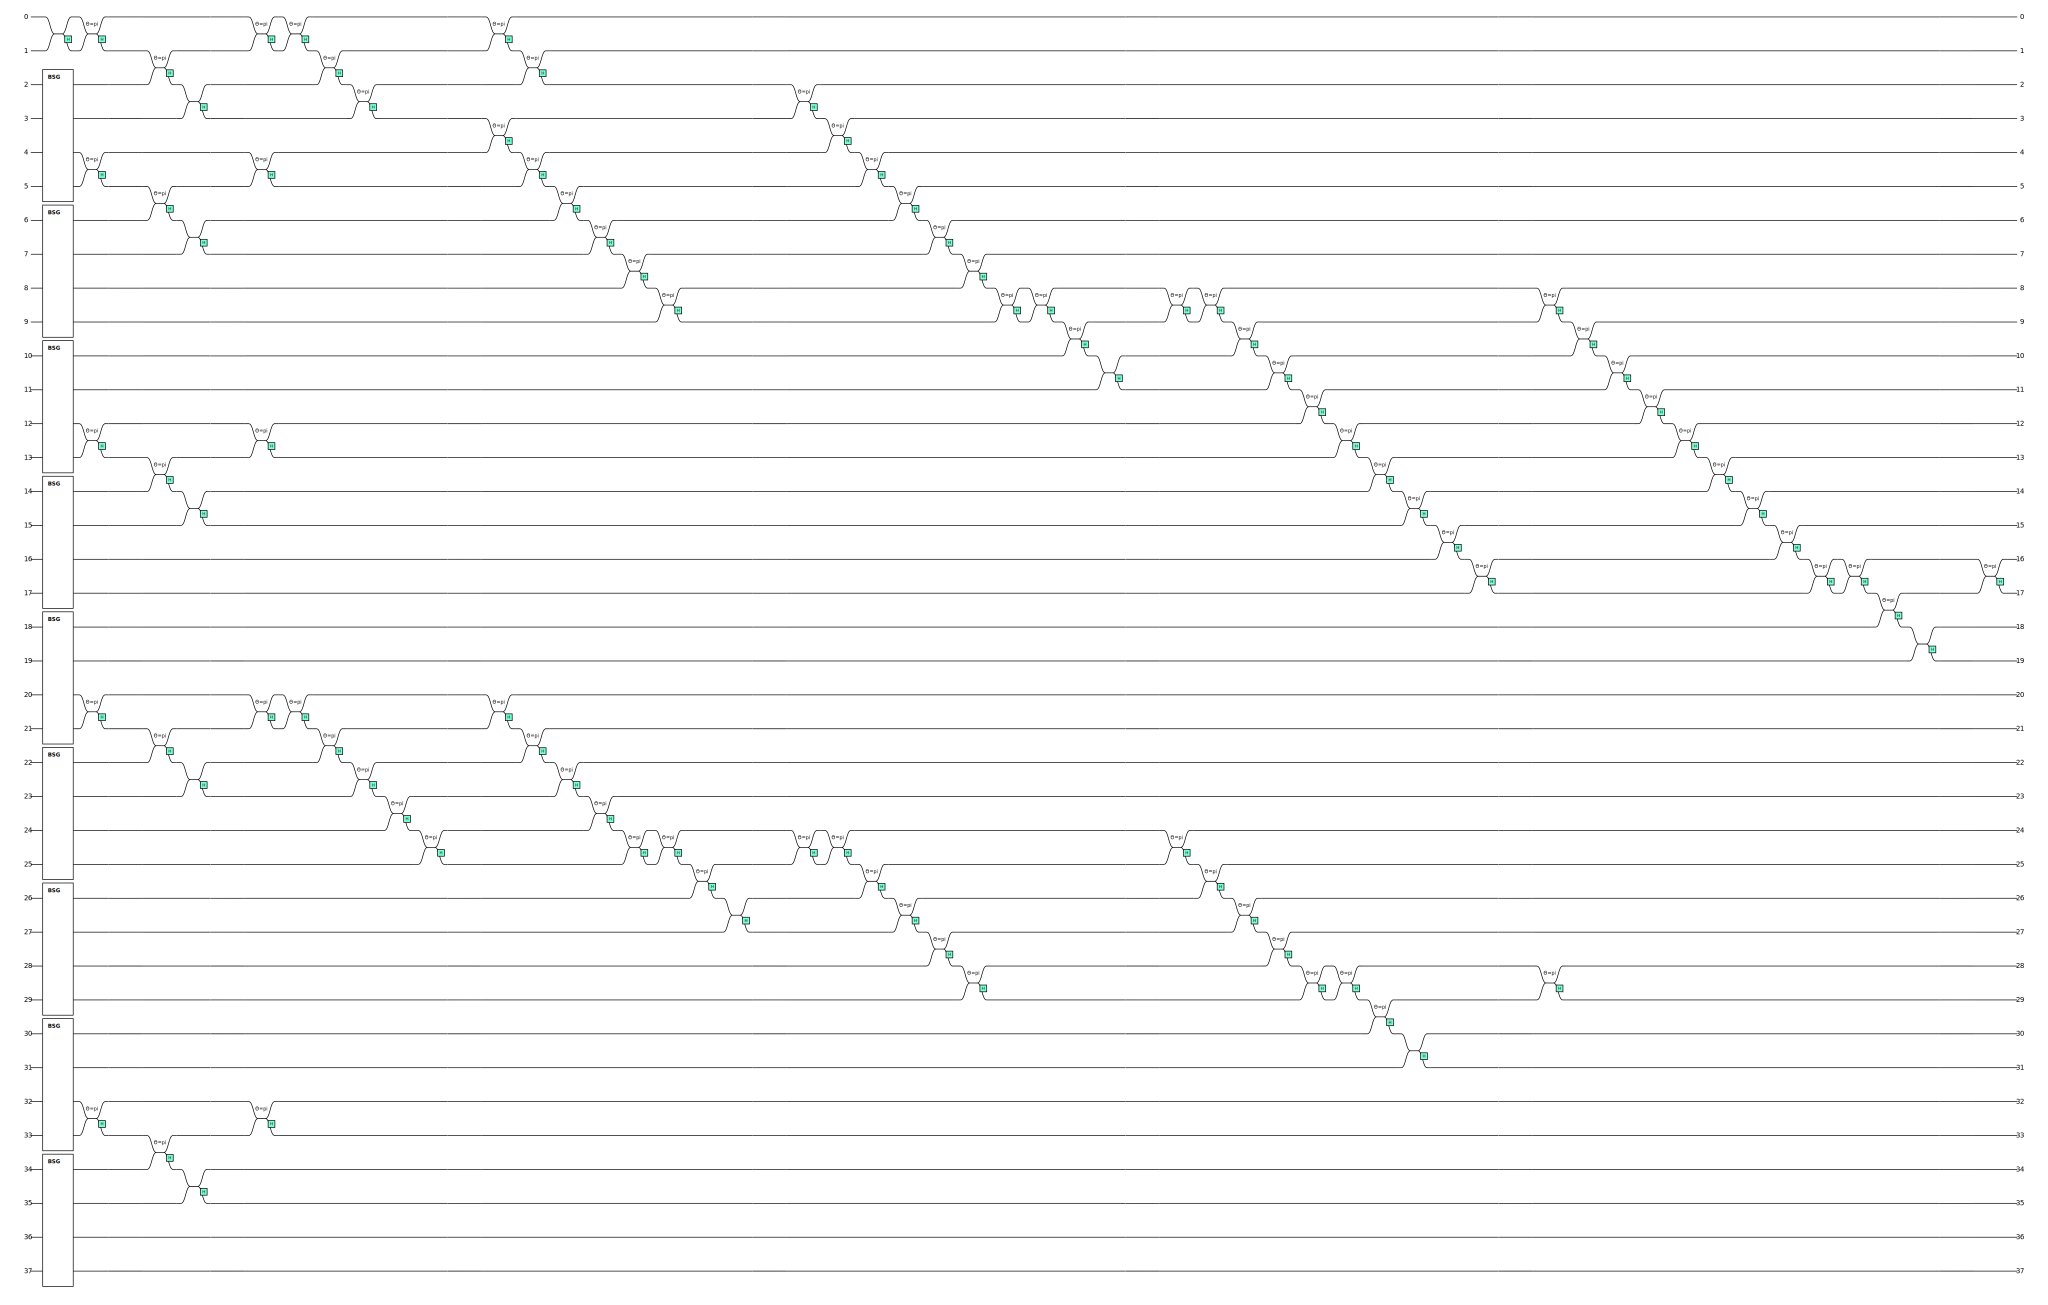

In [5]:
#display the optimal circuit
q.loop.loopify()
pcvl.pdisplay(q.loop.circuit, skin=SymbSkin(compact_display=True))

In [9]:
#compute and display the input state of the circuit
q.loop.calc_in_state()
#and show it
print(q.loop.in_state)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [10]:
#display the logically formatted output: logical state of the qubits followed by the corresponding amplitude.
q.loop.run_format()

0 True 1 True 2 True 3 True 4 True 5 True 6 True 7 True 8 True 9 True 
(-2.6973983046972097e-06+0j)
0 True 1 True 2 True 3 True 4 True 5 True 6 True 7 True 8 True 9 False 
(2.6973983046972127e-06+0j)
0 True 1 True 2 True 3 True 4 False 5 True 6 True 7 True 8 True 9 True 
(-2.697398304697212e-06+0j)
0 True 1 True 2 True 3 True 4 False 5 True 6 True 7 True 8 True 9 False 
(-2.6973983046972085e-06+0j)
0 True 1 True 2 True 3 True 4 True 5 True 6 True 7 True 8 False 9 True 
(2.697398304697215e-06+0j)
0 True 1 True 2 True 3 True 4 True 5 True 6 True 7 True 8 False 9 False 
(-2.69739830469721e-06+0j)
0 True 1 True 2 True 3 True 4 False 5 True 6 True 7 True 8 False 9 True 
(2.697398304697212e-06+0j)
0 True 1 True 2 True 3 True 4 False 5 True 6 True 7 True 8 False 9 False 
(2.6973983046972144e-06+0j)
0 True 1 True 2 True 3 True 4 True 5 True 6 False 7 True 8 True 9 True 
(2.697398304697218e-06+0j)
0 True 1 True 2 True 3 True 4 True 5 True 6 False 7 True 8 True 9 False 
(-2.6973983046972123e-06+

KeyboardInterrupt: 